### Name: Bibek Shah Shankhar
### Student Id: C0835648

#### Problem Statement:
The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset based on certain diagnostic
measurements included in the dataset.

Follow the following 5 stages of on the data set and express your results:
1. Preliminary Data Analysis (10%)
2. Data Processing & Feature Engineering (20%)
3. Modelling (30%)
a. Conventional ML Model
b. Deep Network
c. Wide & Deep Network
4. Evaluation (15%)
5. Discussion (10%)

Guiding Principles:
• Preliminary Data Analysis: Understanding behavior of features against one another (Multi
collinearity) , ranges of the inputs, etc.
• Data Processing & Feature Engineering: Potential normalization, development/removing
features affecting the overall performance of the model, encoding if applicable
• Modeling: On the modeling section, you are required to deliver:
1. Conventional Machine Learning model of your choice fine-tuned using grid-search
techniques to yield best results
2. One Deep Sequential Neural network with dimensions of your choice
3. One wide and deep neural network architecture with dimensions of your choice
• Evaluation: Thought process on your approach on improving individual models (How you
improved individual models by fine-tuning relevant hyper parameters)
• Discussion: How were the 3 models compared with one another? 

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError

In [2]:
#Loading the csv file
df = pd.read_csv('Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#Shape of data
df.shape

(768, 9)

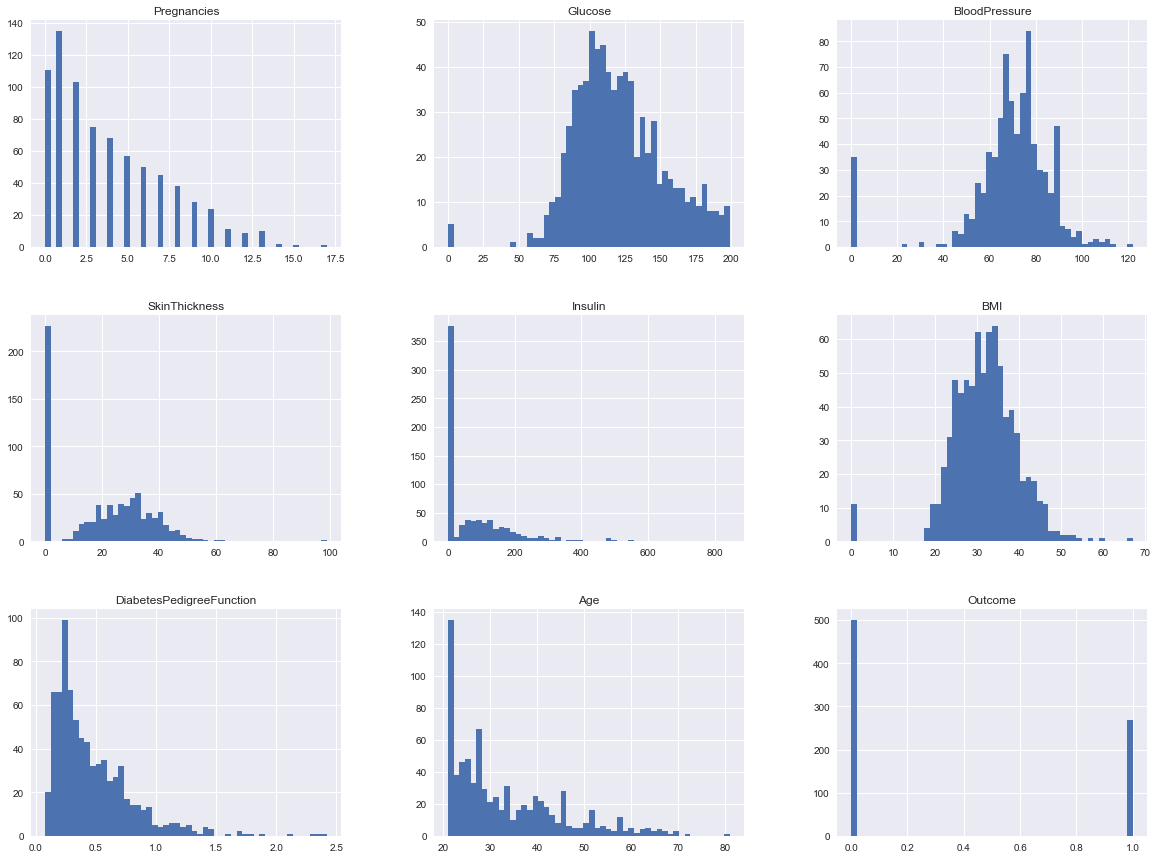

In [5]:
plt.style.use('seaborn')
df.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:xlabel='Outcome', ylabel='count'>

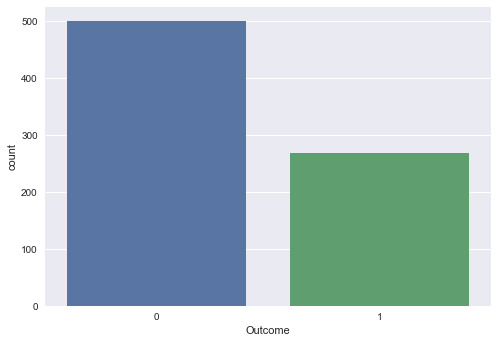

In [6]:
sns.countplot(x=df.Outcome)

In [7]:
correlation = df.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

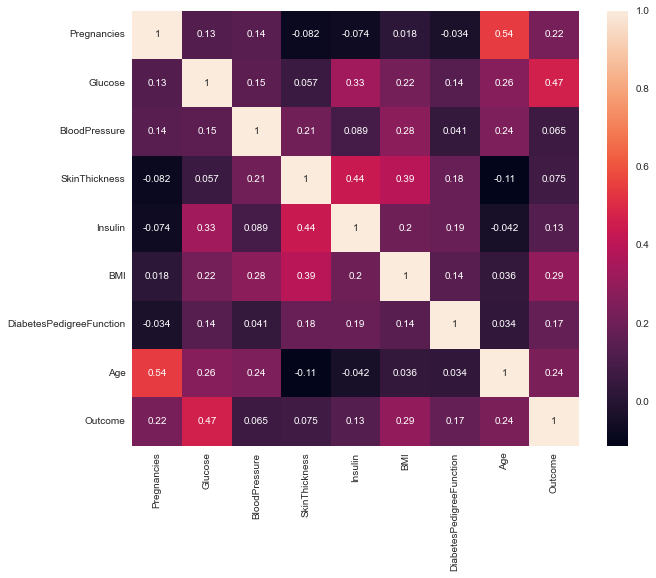

In [8]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(correlation, annot=True, ax=ax)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Standardize Data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


X = df[features]
y = df.Outcome

df_std = scaler.fit_transform(X)
data = pd.DataFrame(df_std, columns=X.columns)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [11]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']


X = data[features]
y = df.Outcome

In [12]:
print(X)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [13]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting into Train and Test

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.3, random_state = 0)

In [15]:
print('Shape of X: ',X.shape)

Shape of X:  (768, 8)


In [16]:
print('Shape of y: ',y.shape)

Shape of y:  (768,)


### Implementing Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)


LogisticRegression()

In [18]:
#predicting the output for our test set
y_pred = LR.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
confusion_matrix

array([[141,  16],
       [ 35,  39]], dtype=int64)

In [20]:
print("The Accuracy of our Logistic Regression Model is : ", metrics.accuracy_score(y_test, y_pred))


The Accuracy of our Logistic Regression Model is :  0.7792207792207793


In [21]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,15]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='lbfgs',multi_class='auto'),
        'params': {
            'C': [.1,1,5,10, 15,20]
        }
    }
}

In [22]:
from sklearn.model_selection import GridSearchCV

s = []

for model_name, m in model_params.items():
    clf =  GridSearchCV(m['model'], m['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    s.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })    
data = pd.DataFrame(s,columns=['model','best_score','best_params'])
data

,model,best_score,best_params
0,svm,0.761561,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.731862,{'n_estimators': 10}
2,logistic_regression,0.757875,{'C': 0.1}


### Diving into Neural Network

In [23]:
from keras.models import Sequential
model = Sequential()

In [24]:
from keras.layers import Dense

#first hidden layer
model.add(Dense(60,activation='relu',input_dim=8))
# Second hidden layer
model.add(Dense(60,activation='relu'))
# Output layer
model.add(Dense(1,activation='sigmoid'))
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
# Training our model for 50 epochs
model.fit(X_train,y_train,epochs=50)


Epoch 1/50
17/17 [==============================] - 0s 997us/step - loss: 0.6664 - accuracy: 0.5922
Epoch 2/50
17/17 [==============================] - 0s 873us/step - loss: 0.5716 - accuracy: 0.6965
Epoch 3/50
17/17 [==============================] - 0s 873us/step - loss: 0.5204 - accuracy: 0.7449
Epoch 4/50
17/17 [==============================] - 0s 873us/step - loss: 0.4884 - accuracy: 0.7616
Epoch 5/50
17/17 [==============================] - 0s 828us/step - loss: 0.4726 - accuracy: 0.7654
Epoch 6/50
17/17 [==============================] - 0s 873us/step - loss: 0.4606 - accuracy: 0.7709
Epoch 7/50
17/17 [==============================] - 0s 873us/step - loss: 0.4550 - accuracy: 0.7803
Epoch 8/50
17/17 [==============================] - 0s 935us/step - loss: 0.4485 - accuracy: 0.7840
Epoch 9/50
17/17 [==============================] - 0s 873us/step - loss: 0.4421 - accuracy: 0.7877
Epoch 10/50
17/17 [==============================] - 0s 873us/step - loss: 0.4390 - accuracy: 0.7840

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                540       
                                                                 
 dense_1 (Dense)             (None, 60)                3660      
                                                                 
 dense_2 (Dense)             (None, 1)                 61        
                                                                 
Total params: 4,261
Trainable params: 4,261
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train and Test accuracy
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

17/17 [==============================] - 0s 873us/step - loss: 0.3233 - accuracy: 0.8566
Training Accuracy: 85.66%

8/8 [==============================] - 0s 855us/step - loss: 0.5367 - accuracy: 0.7446
Testing Accuracy: 74.46%



In [27]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50,batch_size=10)


Epoch 1/50
54/54 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8492 - val_loss: 0.5414 - val_accuracy: 0.7532
Epoch 2/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3434 - accuracy: 0.8305 - val_loss: 0.5330 - val_accuracy: 0.7532
Epoch 3/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3349 - accuracy: 0.8417 - val_loss: 0.5474 - val_accuracy: 0.7706
Epoch 4/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8585 - val_loss: 0.5612 - val_accuracy: 0.7619
Epoch 5/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8585 - val_loss: 0.5476 - val_accuracy: 0.7489
Epoch 6/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8659 - val_loss: 0.5521 - val_accuracy: 0.7576
Epoch 7/50
54/54 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8771 - val_loss: 0.5640 - val_accuracy: 0.7706
Epoch 8/50
54/54 [==

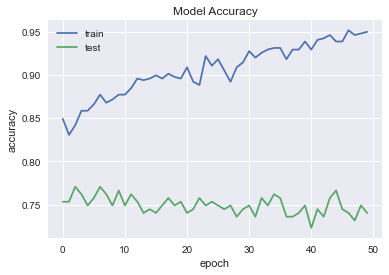

In [28]:
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

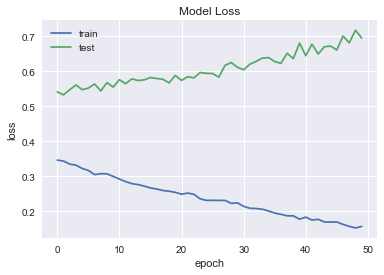

In [29]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

###  Wide and Deep Neural Network

In [30]:
import keras
from keras.layers import concatenate
input = keras.layers.Input(shape=X.shape[1:])
hidden1 = keras.layers.Dense(64, activation="relu")(input)
hidden2 = keras.layers.Dense(64, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(1, activation='sigmoid')(hidden2)
concat = keras.layers.concatenate([input,hidden1, hidden2,hidden3])
output = keras.layers.Dense(1)(concat)
model1 = keras.models.Model(inputs=[input], outputs=[output])


model1.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history=model1.fit(X_train, y_train, validation_data=(X_test, y_test),epochs= 50,batch_size=10)


Epoch 1/50
54/54 [==============================] - 1s 3ms/step - loss: 3.3134 - accuracy: 0.6331 - val_loss: 2.7229 - val_accuracy: 0.6797
Epoch 2/50
54/54 [==============================] - 0s 1ms/step - loss: 2.7414 - accuracy: 0.6834 - val_loss: 2.0958 - val_accuracy: 0.7100
Epoch 3/50
54/54 [==============================] - 0s 1ms/step - loss: 1.5494 - accuracy: 0.7020 - val_loss: 1.3819 - val_accuracy: 0.7013
Epoch 4/50
54/54 [==============================] - 0s 1ms/step - loss: 1.0622 - accuracy: 0.7393 - val_loss: 1.0756 - val_accuracy: 0.7273
Epoch 5/50
54/54 [==============================] - 0s 1ms/step - loss: 0.7000 - accuracy: 0.7318 - val_loss: 0.9631 - val_accuracy: 0.7273
Epoch 6/50
54/54 [==============================] - 0s 1ms/step - loss: 0.5695 - accuracy: 0.7356 - val_loss: 0.5979 - val_accuracy: 0.7576
Epoch 7/50
54/54 [==============================] - 0s 1ms/step - loss: 0.5050 - accuracy: 0.7691 - val_loss: 0.5901 - val_accuracy: 0.7706
Epoch 8/50
54/54 [==

In [31]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 64)           576         ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 64)           4160        ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 1)            65          ['dense_4[0][0]']                
                                                                                              

In [32]:
# Train and Test accuracy
scores = model1.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model1.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

17/17 [==============================] - 0s 810us/step - loss: 0.3268 - accuracy: 0.8790
Training Accuracy: 87.90%

8/8 [==============================] - 0s 855us/step - loss: 1.0378 - accuracy: 0.7749
Testing Accuracy: 77.49%



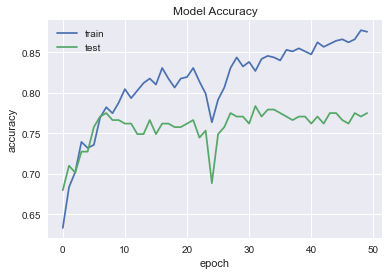

In [33]:
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

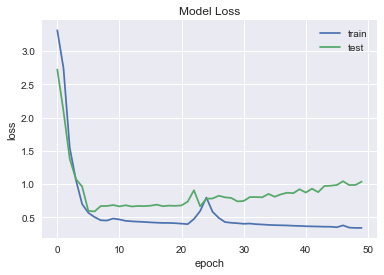

In [34]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

### Conclusion
from simple Deep Learning algorithm we can see that we are getting 85 % accuracy on train dataset and 74 % accuracy on Test set.
And on wide neural network we are getting 87% on train set and 77% on test set.